In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
#1.

cardio = pd.read_csv("../Data/cardio_train.csv", sep=";")
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# 1.1 EDA
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


cardio
0    35021
1    34979
Name: count, dtype: int64


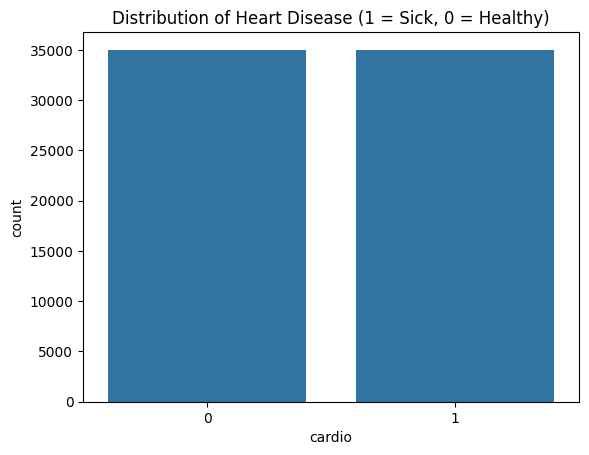

In [9]:
# Hjärtkärlsjukdom
print(cardio["cardio"].value_counts())
sns.countplot(x="cardio", data=cardio)
plt.title("Distribution of Heart Disease (1 = Sick, 0 = Healthy)")
plt.show()


cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


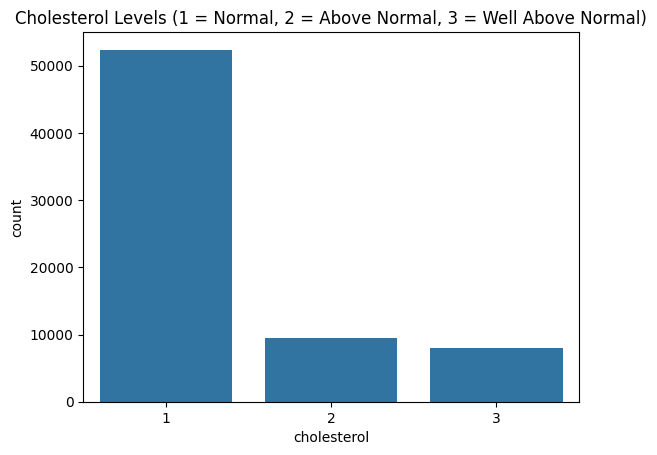

In [10]:
# Kolesterolvärden
print(cardio["cholesterol"].value_counts())
sns.countplot(x="cholesterol", data=cardio)
plt.title("Cholesterol Levels (1 = Normal, 2 = Above Normal, 3 = Well Above Normal)")
plt.show()


count    70000.000000
mean        53.339358
std          6.759594
min         29.583562
25%         48.394521
50%         53.980822
75%         58.430137
max         64.967123
Name: age, dtype: float64


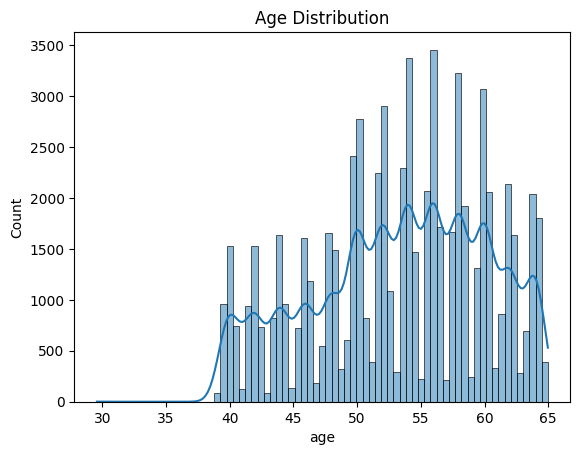

In [11]:
# Åldersfördelning
cardio["age"] = cardio["age"] / 365
print(cardio["age"].describe())
sns.histplot(cardio["age"], kde=True)
plt.title("Age Distribution")
plt.show()


smoke
0    63831
1     6169
Name: count, dtype: int64


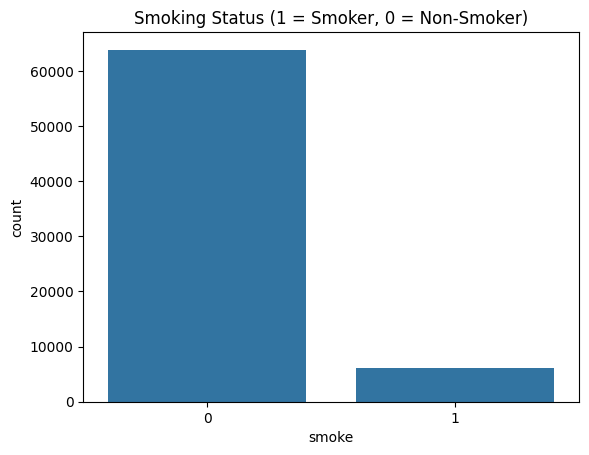

In [12]:
# Andel rökare
print(cardio["smoke"].value_counts())
sns.countplot(x="smoke", data=cardio)
plt.title("Smoking Status (1 = Smoker, 0 = Non-Smoker)")
plt.show()


count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64


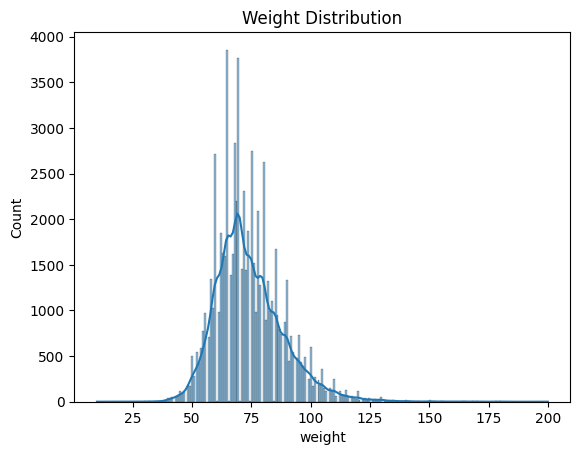

In [13]:
# Viktfördelning
print(cardio["weight"].describe())
sns.histplot(cardio["weight"], kde=True)
plt.title("Weight Distribution")
plt.show()


count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64


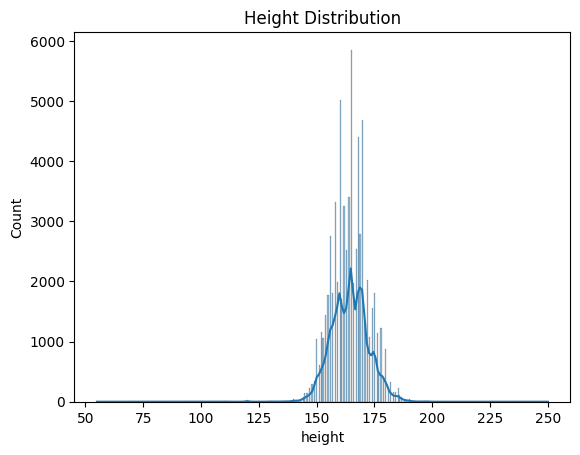

In [14]:
# Längdfördelning
print(cardio["height"].describe())
sns.histplot(cardio["height"], kde=True)
plt.title("Height Distribution")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_21808\1567614457.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Men', 'Women'], y=[men_percentage, women_percentage], palette=['blue', 'pink'])


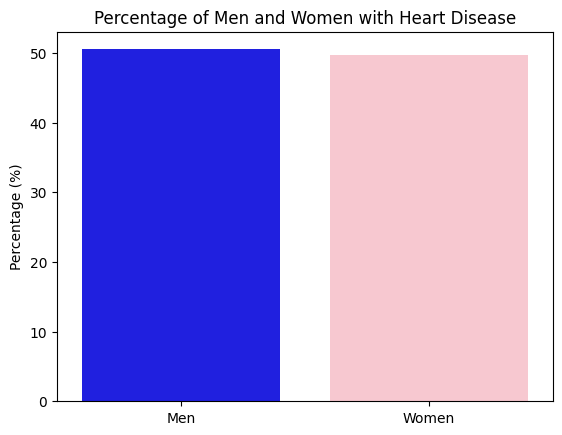

In [17]:
# Andel kvinnor respektive män med hjärtkärlsjukdom
num_men_with_cardio = cardio[(cardio['gender'] == 2) & (cardio['cardio'] == 1)].shape[0]
num_women_with_cardio = cardio[(cardio['gender'] == 1) & (cardio['cardio'] == 1)].shape[0]
total_men = cardio[cardio['gender'] == 2].shape[0]
total_women = cardio[cardio['gender'] == 1].shape[0]
men_percentage = (num_men_with_cardio / total_men) * 100
women_percentage = (num_women_with_cardio / total_women) * 100
sns.barplot(x=['Men', 'Women'], y=[men_percentage, women_percentage], palette=['blue', 'pink'])
plt.title("Percentage of Men and Women with Heart Disease")
plt.ylabel("Percentage (%)")
plt.show()


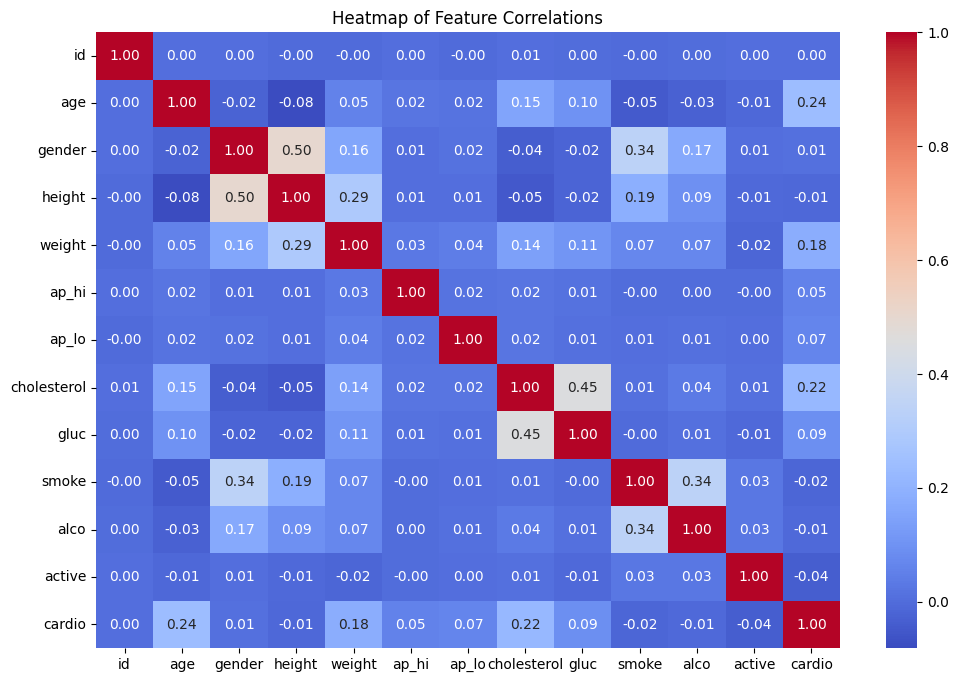

In [18]:
# 1.2 Modelldesign
# Heatmap av korrelationer
plt.figure(figsize=(12, 8))
sns.heatmap(cardio.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Feature Correlations")
plt.show()
 

C:\Users\user\AppData\Local\Temp\ipykernel_21808\1889341211.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(cardio[["bmi_category", "cardio"]].groupby("bmi_category").mean())


                     cardio
bmi_category               
Underweight        0.276398
Normal weight      0.398739
Overweight         0.508199
Obese (Class I)    0.601872
Obese (Class II)   0.678333
Obese (Class III)  0.694105


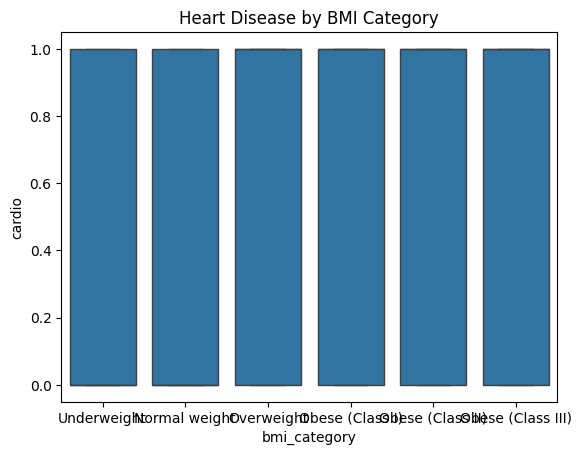

                  cardio
blood_pressure          
0               0.667450
1               0.159221
2               0.320997
3               0.743663
4               0.846282
5               0.846774
6               0.906250


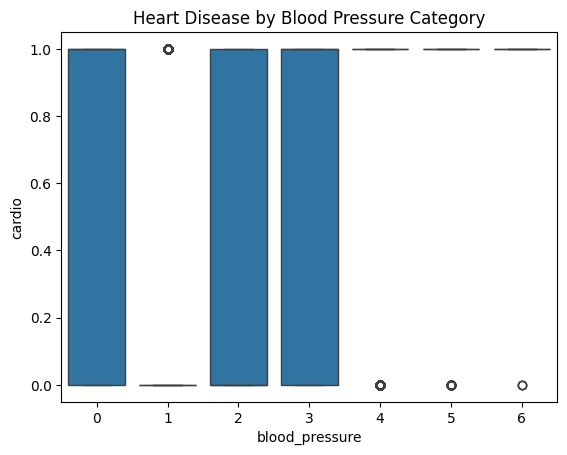

In [23]:
# 1.2.1 Feature Engineering

# a) BMI-feature

cardio["bmi"] = cardio["weight"] / (cardio["height"] / 100) ** 2
cardio = cardio[(cardio["bmi"] > 10) & (cardio["bmi"] < 100)]

# b) Kategorisk BMI-feature

bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float("inf")]
bmi_labels = ["Underweight", "Normal weight", "Overweight", "Obese (Class I)", "Obese (Class II)", "Obese (Class III)"]
cardio["bmi_category"] = pd.cut(cardio["bmi"], bins=bmi_bins, labels=bmi_labels)

# c) Relevans av BMI-kategori

print(cardio[["bmi_category", "cardio"]].groupby("bmi_category").mean())
sns.boxplot(x="bmi_category", y="cardio", data=cardio)
plt.title("Heart Disease by BMI Category")
plt.show()

#Blodtryckskategorier

cardio["blood_pressure"] = 0
cardio.loc[(cardio["ap_lo"] <= 60) & (cardio["ap_hi"] <= 90), "blood_pressure"] = 1
cardio.loc[(cardio["ap_lo"] > 60) & (cardio["ap_lo"] <= 80) & (cardio["ap_hi"] > 90) & (cardio["ap_hi"] <= 120), "blood_pressure"] = 2
cardio.loc[(cardio["ap_lo"] > 80) & (cardio["ap_lo"] <= 90) & (cardio["ap_hi"] > 120) & (cardio["ap_hi"] <= 140), "blood_pressure"] = 3
cardio.loc[(cardio["ap_lo"] > 90) & (cardio["ap_lo"] <= 100) & (cardio["ap_hi"] > 140) & (cardio["ap_hi"] <= 160), "blood_pressure"] = 4
cardio.loc[(cardio["ap_lo"] > 100) & (cardio["ap_lo"] <= 120) & (cardio["ap_hi"] > 160) & (cardio["ap_hi"] <= 180), "blood_pressure"] = 5
cardio.loc[(cardio["ap_lo"] > 120) & (cardio["ap_lo"] <= 200) & (cardio["ap_hi"] > 180) & (cardio["ap_hi"] <= 250), "blood_pressure"] = 6

# Relevans av blodtryckskategorier

print(cardio[["blood_pressure", "cardio"]].groupby("blood_pressure").mean())
sns.boxplot(x="blood_pressure", y="cardio", data=cardio)
plt.title("Heart Disease by Blood Pressure Category")
plt.show()


In [25]:
# 1.2.2 Skapa två dataset

# Dataset med kategorisk data tillagd

cardio_cat = cardio.copy()
cardio_cat = pd.get_dummies(cardio_cat, columns=["bmi_category", "blood_pressure", "gender"], drop_first=True)
cardio_cat.drop(columns=["height", "weight", "bmi"], inplace=True)

# Dataset med endast BMI tillagd

cardio_bmi = cardio.copy()
cardio_bmi.drop(columns=["bmi_category", "blood_pressure", "height", "weight"], inplace=True)
cardio_bmi = pd.get_dummies(cardio_bmi, columns=["gender"], drop_first=True)


In [39]:
# 1.2.3 Utförande

import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Ladda data
# Exempel: df = pd.read_csv('data.csv')
# Antag att 'target' är kolumnen du förutspår
df = cardio  # Byt ut detta mot din verkliga DataFrame
X = df.drop(columns=['id', 'cardio'])
y = df['cardio']

# Dela upp data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
# Funktion för att träna och utvärdera modeller

def evaluate_model(model, param_grid, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    return grid


# Omvandla kategoriska kolumner till dummyvariabler
df = pd.get_dummies(df, drop_first=True)

# Kontrollera om det finns några kvarvarande icke-numeriska kolumner
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [62]:
# Definiera och utvärdera modeller
# 1. Support Vector Machine (SVM)

param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear']
}

grid_svm = evaluate_model(SVC(), param_grid_svm, X_train, y_train)
print("SVM - Bästa parametrar:", grid_svm.best_params_)
print("SVM - Bästa noggrannhet:", grid_svm.best_score_)

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Overweight'


In [45]:
# Random Forest

param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20]
}
grid_rf = evaluate_model(RandomForestClassifier(), param_grid_rf, X_train, y_train)
print("Random Forest - Bästa parametrar:", grid_rf.best_params_)
print("Random Forest - Bästa noggrannhet (träningsdata):", grid_rf.best_score_)


ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Overweight'


In [46]:
# K-Nearest Neighbors (KNN)

param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_knn = evaluate_model(KNeighborsClassifier(), param_grid_knn, X_train, y_train)
print("KNN - Bästa parametrar:", grid_knn.best_params_)
print("KNN - Bästa noggrannhet (träningsdata):", grid_knn.best_score_)


ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Overweight'


In [47]:
# Utvärdera modellerna på testdata

from sklearn.metrics import accuracy_score

# SVM
best_svm_model = grid_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM - Testnoggrannhet:", accuracy_svm)

# Random Forest
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest - Testnoggrannhet:", accuracy_rf)

# KNN
best_knn_model = grid_knn.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN - Testnoggrannhet:", accuracy_knn)


NameError: name 'grid_svm' is not defined